<h1> 2024 LoL Championship Player Stats & Swiss Stage <h1>


<h3> Imports <h3>

In [154]:
from encodings import normalize_encoding

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import scipy.stats as stats
import plotly.graph_objects as go
import ipywidgets as widgets


In [155]:
#Data
df=pd.read_csv("../data/player_statistics_cleaned_final.csv")

<h3> Data exploration <h3>

In [156]:
print("Dataset Overview:")
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")
print(f"Columns: {df.columns.tolist()}")
print(f"Data Types:\n{df.dtypes}\n")

Dataset Overview:
Rows: 81
Columns: 27
Columns: ['TeamName', 'PlayerName', 'Position', 'Games', 'Win rate', 'KDA', 'Avg kills', 'Avg deaths', 'Avg assists', 'CSPerMin', 'GoldPerMin', 'KP%', 'DamagePercent', 'DPM', 'VSPM', 'Avg WPM', 'Avg WCPM', 'Avg VWPM', 'GD@15', 'CSD@15', 'XPD@15', 'FB %', 'FB Victim', 'Penta Kills', 'Solo Kills', 'Country', 'FlashKeybind']
Data Types:
TeamName          object
PlayerName        object
Position          object
Games              int64
Win rate         float64
KDA              float64
Avg kills        float64
Avg deaths       float64
Avg assists      float64
CSPerMin         float64
GoldPerMin         int64
KP%              float64
DamagePercent    float64
DPM                int64
VSPM             float64
Avg WPM          float64
Avg WCPM         float64
Avg VWPM         float64
GD@15              int64
CSD@15             int64
XPD@15             int64
FB %             float64
FB Victim        float64
Penta Kills        int64
Solo Kills        object


<h4>Columns description<h4>


* TeamName: The player’s team (e.g., Top Esports, Dplus KIA).
* PlayerName: The player’s in-game name.
* Games: Total games played.
* Win Rate: Player’s win rate in percentage.
* KDA: Kill-Death-Assist ratio, indicating performance balance.
* Avg Kills, Avg Deaths, Avg Assists: Average kills, deaths, and assists per game.
* CSM (Creep Score per Minute): Average minions/creeps killed per minute.
* GPM (Gold Per Minute): Average gold earned per minute.
* KP% (Kill Participation): Percentage of team kills in which the player participated.
* DMG% (Damage Percentage): Percentage of team damage dealt by the player.
* DPM (Damage Per Minute): Average damage dealt per minute.
* VSPM (Vision Score Per Minute): Vision score, representing map awareness, calculated per minute.
* Avg WPM (Wards Placed per Minute): Average number of wards placed per minute.
* Avg WCPM (Wards Cleared per Minute): Average number of enemy wards cleared per minute.
* Avg VWPM (Vision Wards Placed per Minute): Average number of vision wards placed per minute.
* GD@15 (Gold Differential at 15): Gold advantage or disadvantage at 15 minutes.
* CSD@15 (Creep Score Differential at 15): Creep score advantage or disadvantage at 15 minutes.
* XPD@15 (Experience Differential at 15): Experience point advantage or disadvantage at 15 minutes.
* FB % (First Blood Percentage): Percentage chance of achieving first blood in a match.
* FB Victim: Percentage chance of the player being the victim of first blood.
* Penta Kills: Number of pentakills (achieving five kills in quick succession) by the player.
* Solo Kills: Number of solo kills by the player.
* Country: Player's region or country of representation.
* FlashKeybind: Flash key preference for the player (D or F).

In [157]:
df.describe()

,Games,Win rate,KDA,Avg kills,Avg deaths,Avg assists,CSPerMin,GoldPerMin,KP%,DamagePercent,...,VSPM,Avg WPM,Avg WCPM,Avg VWPM,GD@15,CSD@15,XPD@15,FB %,FB Victim,Penta Kills
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.00000,81.000000,81.000000,81.000000,...,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.0
mean,8.641975,0.455975,3.765432,2.686420,2.875309,6.755556,6.65679,362.654321,0.680790,0.199605,...,1.768025,0.743333,0.350988,0.269259,-36.753086,-0.469136,-17.876543,0.291654,0.098086,0.0
std,2.908215,0.214833,1.834677,1.519355,0.896734,2.390293,3.04885,72.095797,0.088962,0.084498,...,1.031010,0.676966,0.119610,0.162471,324.379081,5.886609,301.186752,0.203314,0.128330,0.0
min,3.000000,0.000000,1.200000,0.200000,1.300000,1.800000,1.00000,225.000000,0.410000,0.052000,...,0.760000,0.230000,0.100000,0.060000,-1172.000000,-16.000000,-797.000000,0.000000,0.000000,0.0
25%,6.000000,0.333000,2.400000,1.200000,2.400000,4.900000,5.70000,320.000000,0.623000,0.135000,...,1.100000,0.380000,0.250000,0.160000,-207.000000,-4.000000,-183.000000,0.143000,0.000000,0.0
50%,8.000000,0.500000,3.400000,2.500000,2.900000,6.200000,7.90000,385.000000,0.691000,0.215000,...,1.350000,0.450000,0.370000,0.190000,-3.000000,0.000000,6.000000,0.250000,0.077000,0.0
75%,10.000000,0.615000,4.400000,3.900000,3.300000,8.300000,8.90000,416.000000,0.751000,0.275000,...,1.700000,0.530000,0.430000,0.380000,159.000000,3.000000,147.000000,0.444000,0.143000,0.0
max,14.000000,0.875000,9.300000,5.600000,5.600000,12.400000,10.50000,486.000000,0.849000,0.337000,...,4.250000,2.430000,0.590000,0.670000,741.000000,10.000000,749.000000,0.800000,0.600000,0.0


<h3> Data Visualization<h3>

<h4> Win rate

In [158]:
df['Win rate'] = df["Win rate"].round(2)
winRate_counts = df.groupby('Win rate')['PlayerName'].apply(lambda x: ', '.join(x)).reset_index()
fig = px.bar(
    winRate_counts,
    x='Win rate',
    y=winRate_counts['PlayerName'].apply(lambda x: len(x.split(','))),
    hover_data={'Win rate': True, 'PlayerName': True},
    labels={'Win rate': 'Win Rate', 'y': 'Number of Players'},
    title="Distribution of Win Rates among all Players"
)
fig.show()

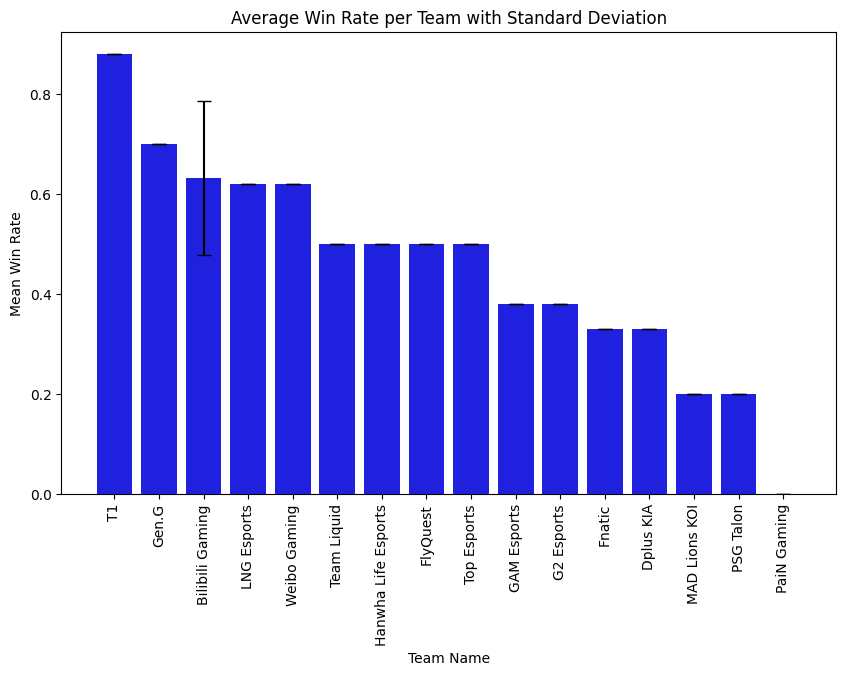

In [159]:
team_stats = df.groupby('TeamName')['Win rate'].agg(['mean', 'std']).reset_index()
team_stats = team_stats.sort_values(by='mean', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='TeamName', y='mean', data=team_stats, color='blue')

plt.errorbar(team_stats['TeamName'], team_stats['mean'], yerr=team_stats['std'], fmt='none', color='black', capsize=5)

plt.xticks(rotation=90)  # Obrót nazw drużyn, aby były czytelne
plt.xlabel('Team Name')
plt.ylabel('Mean Win Rate')
plt.title('Average Win Rate per Team with Standard Deviation')
plt.show()

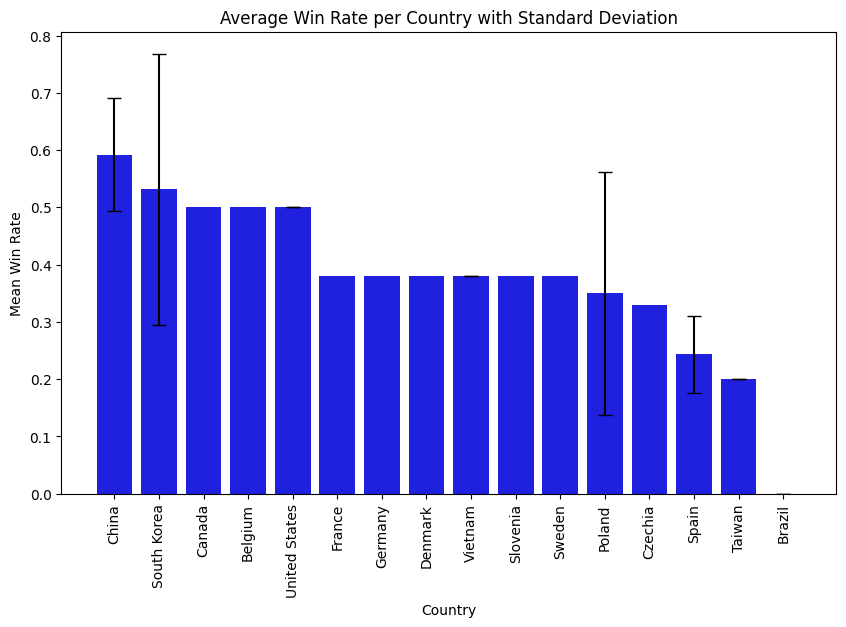

In [160]:
team_stats = df.groupby('Country')['Win rate'].agg(['mean', 'std']).reset_index()
team_stats = team_stats.sort_values(by='mean', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='mean', data=team_stats, color='blue')

plt.errorbar(team_stats['Country'], team_stats['mean'], yerr=team_stats['std'], fmt='none', color='black', capsize=5)

plt.xticks(rotation=90)  # Obrót nazw drużyn, aby były czytelne
plt.xlabel('Country')
plt.ylabel('Mean Win Rate')
plt.title('Average Win Rate per Country with Standard Deviation')
plt.show()

<h4> KDA

In [161]:
# Top 5 players KDA
top_kda = df.nlargest(5, 'KDA')[['PlayerName', 'TeamName','Country', 'KDA',"Position"]]
print(top_kda)

   PlayerName     TeamName      Country  KDA Position
62      scout  LNG Esports  South Korea  9.3      Mid
29   gumayusi           T1  South Korea  9.1      Adc
59       peyz        Gen.G  South Korea  8.4      Adc
14      chovy        Gen.G  South Korea  7.8      Mid
38      keria           T1  South Korea  7.5  Support


In [162]:
fig = px.bar(
    top_kda,
    x='PlayerName',
    y='KDA',
    orientation='v',  # Orientacja pozioma
    title='Top 5 players KDA',
    labels={'PlayerName': 'Player Name', 'KDA': 'KDA'},  # Etykiety osi
    text='KDA',  # Dodanie wartości KDA do tooltipa
    hover_data={'TeamName': True, "Country": True, "Position": True}
)
fig.update_traces(marker_color='lightblue', textposition='outside')  # Kolor słupków i pozycja tekstu
fig.update_layout(
    yaxis_title='KDA',
    xaxis_title='Player Name'
)

# Wyświetlenie wykresu
fig.show()

In [163]:
team_kda = df.groupby('TeamName', as_index=False)['KDA'].mean()
team_kda = team_kda.sort_values(by='KDA', ascending=False)
team_kda['KDA'] = team_kda['KDA'].round(2)

In [164]:
fig = px.bar(
    team_kda,
    x='TeamName',
    y='KDA',
    orientation='v',  # Orientacja pozioma
    title='Mean KDA per Team',
    labels={'TeamName': 'Team Name', 'KDA': 'Mean KDA'},  # Etykiety osi
    text='KDA'  # Wyświetlenie wartości KDA na tooltipie
)

fig.update_traces(marker_color='purple', textposition='outside')  # Kolor słupków i pozycja tekstu
fig.update_layout(
    yaxis_title='Mean KDA',
    xaxis_title='Team Name',
    template='plotly_white'
)

fig.show()

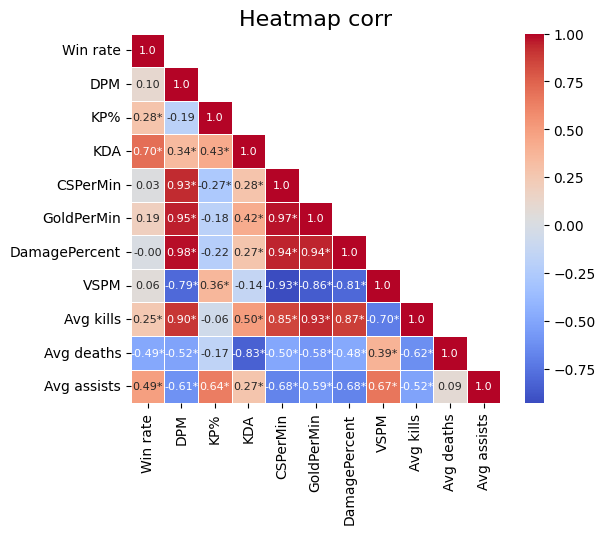

In [165]:
variables = ['Win rate','DPM', 'KP%', 'KDA', 'CSPerMin', 'GoldPerMin', 'DamagePercent', 'VSPM', 'Avg kills', 'Avg deaths', 'Avg assists']
p_values = pd.DataFrame(index=variables, columns=variables)

for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            corr, p_val = stats.pearsonr(df[var1], df[var2])
            p_values.loc[var1, var2] = p_val


correlation_matrix = df[variables].corr()


annot_matrix = correlation_matrix.copy().astype(object)

for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            if p_values.loc[var1, var2] < 0.05:  # If correlation is significant (p < 0.05)
                annot_matrix.loc[var1, var2] = f"{correlation_matrix.loc[var1, var2]:.2f}*"
            else:
                annot_matrix.loc[var1, var2] = f"{correlation_matrix.loc[var1, var2]:.2f}"


mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)



sns.heatmap(
    correlation_matrix,
    annot=annot_matrix,
    cmap='coolwarm',
    fmt='',
    mask=mask,
    cbar=True,
    linewidths=0.5,
    square=True,
    annot_kws={'size': 8}

)

plt.title('Heatmap corr', fontsize=16)
plt.show()

In [166]:
def create_radar_chart(player):

    player_data = df[df['PlayerName'] == player].iloc[0]
    player_position = player_data['Position']
    player_kda = player_data['KDA']
    player_team = player_data['TeamName']


    categories1 = ['Average kills', 'Average deaths', 'Average assists']
    values1 = [player_data['Avg kills'], player_data['Avg deaths'], player_data['Avg assists']]
    position_mean_values = df[df['Position'] == player_position][['Avg kills', 'Avg deaths', 'Avg assists']].mean().tolist()


    fig2 = go.Figure()

    fig2.add_trace(go.Scatterpolar(
        r=values1,
        theta=categories1,
        fill='toself',
        name=f"{player} (Player)"
    ))

    fig2.add_trace(go.Scatterpolar(
        r=position_mean_values,
        theta=categories1,
        fill='toself',
        opacity=0.2,
        name=f"Average ({player_position})",
        line=dict(color='red', dash='dash')
    ))

    fig2.add_annotation(
        x=0.5, y=1.1,  # Pozycja na wykresie (można dostosować)
        xref="paper", yref="paper",  # Oś papieru, by umieścić tekst poza wykresem
        text=f"KDA: {player_kda:.2f}",  # Tekst KDA
        showarrow=False,
        font=dict(size=14, color="black"),  # Czcionka
        align="center"
     )

    fig2.update_layout(
        polar=dict(
            radialaxis=dict(range=[0, max(max(values1), max(position_mean_values)) + 1], tickvals=[0, max(values1)//2, max(values1)]),
        ),
        showlegend=True,
        title=f"Radar chart for {player} from {player_team} and Average Stats for Position ({player_position})",
    )

    # Wyświetlanie wykresu radarowego
    fig2.show()

players = df['PlayerName'].unique()


dropdown = widgets.Dropdown(
    options=players,
    description='Player:',
    disabled=False
)

widgets.interactive(create_radar_chart, player=dropdown)


interactive(children=(Dropdown(description='Player:', options=('369', 'aiming', 'alvaro', 'apa', 'azhi', 'bett…